In this note book I will discuss diffrent data points about coffee beans!

Below, you can find all the set of features, provided in the dataset:
*   **Quality Measures**
    * Aroma
    * Flavor
    * Aftertaste
    * Acidity
    * Body
    * Balance
    * Uniformity
    * Clean.Cup
    * Sweetness
    * Cupper.Points	
    * Moisture


*   **Bean Metadata**
    * Processing.Method
    * Color
    * Harvest.Year
    * Grading.Date

*   **Farm Metadata**
    * Owner
    * Country.of.Origin
    * Farm.Name
    * Lot.Number
    * Mill
    * Company
    * Region
    * Producer
    * Altitude



In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

import sys
import warnings

%matplotlib inline
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import json

In [ ]:
fname = "arabica_data.csv"
df = pd.read_csv(join(path_prefix, fname))


#  Removing Columns with High Missing Values

During data collection, some values can be lost, which are called missing values and are usually labelled as NaN in a DataFrame.

The goal of this project is to remove columns that contain a high number of missing values. If the missing value percentage in a column is greater than or equal to 20%, I will drop that column from the dataset.

First, I will print the number of columns in the dataset. Then, I will identify the columns that contain missing values whose percentage is greater than or equal to 20%. I will print the name of each column and the percentage of missing values in that column. After that, I will remove each of these columns from the dataset. Finally, I will print the number of remaining columns in the dataset to confirm that the correct columns have been removed.

```

In [ ]:
# your code i should firstly count the number of colomns 
# first i need to create a loop and count each row for any missing value in its 

#cols
#after fininging the first part,assign and create a function that drops cols with 20 percent missing values or more

#then print the message that after removing there are and df.shape[1]
#


rows = df.shape[0]
print('Initially, there are',len(df.columns),'columns')
dv = 100*df.isna().sum()/rows


for i in range(len(df.columns)-1):
  print(dv[i],'% of the values are missing in column',dv[[i+1]])
  



# nulldf=df[df.columns[df.isnull().mean() > 0.2]]
# """ in this line i saw the columns
# # with more than 20% and from there i know there is farm lot number and mill so i have
# # to remove them at the end""" after knowing that the columns are 27 now we have 
# # 24 after taking out three 

df = df.drop(["Farm.Name", "Lot.Number", "Mill"], axis=1)

#dv = dv[dv[0] > 0.2]

print('After removing columns with high missing value percentage, there are,',len(df.columns),'columns')





Initially, there are 27 columns
0.5339435545385202 % of the values are missing in column Country.of.Origin    0.076278
dtype: float64
0.07627765064836003 % of the values are missing in column Farm.Name    27.154844
dtype: float64
27.15484363081617 % of the values are missing in column Lot.Number    79.405034
dtype: float64
79.40503432494279 % of the values are missing in column Mill    23.646072
dtype: float64
23.64607170099161 % of the values are missing in column Company    15.942029
dtype: float64
15.942028985507246 % of the values are missing in column Region    4.347826
dtype: float64
4.3478260869565215 % of the values are missing in column Producer    17.54386
dtype: float64
17.54385964912281 % of the values are missing in column Harvest.Year    3.58505
dtype: float64
3.5850495804729214 % of the values are missing in column Grading.Date    0.0
dtype: float64
0.0 % of the values are missing in column Processing.Method    11.594203
dtype: float64
11.594202898550725 % of the values 

# Q2: Calculating Total Quality Score

In [ ]:
# # your code
# f2 = pd.DataFrame(df, index= ['count','mean','std','min','25%','50%','75%','max'],columns = ['Total Score'])


# we count the quality prefrences in another new df2 THEN WE ASSIGN  and count the total number of each  then use .describe and save the results in a new dataframe then print it
# df2.loc[index, 'mean'] = 
# # df2.loc[index, 'count'] = 

# # df2.loc[index, 'mean'] = 
# # df.loc[index, 'std'] = 
# # df.loc[index, 'min'] = 

# df.loc[index, '25%'] = 
# df.loc[index, '50%'] = 
# df.loc[index, '75%'] = 
# df.loc[index, '100%'] = Total score= ['Delhi', 'Bangalore', 'Chennai', 'Patna'] total scores of 
sum_column = df["Aroma"] + df["Flavor"]+ df["Aftertaste"]+ df["Acidity"]+ df["Body"]+ df["Balance"]+ df["Uniformity"]+ df["Clean.Cup"]+ df["Sweetness"]+ df["Cupper.Points"]
df["Total Score"] = sum_column

df["Total Score"].describe()





count    1311.000000
mean       84.464366
std         3.525789
min        51.593880
25%        82.404997
50%        84.661416
75%        86.864485
max        94.603712
Name: Total Score, dtype: float64

# Q3: Unit Conversion

In [ ]:
k = df[['unit_of_measurement','altitude_mean_meters']]
k= k.dropna()# first we drop all Nan values which had me at the end of the code

meters = k.loc[k["unit_of_measurement"] == 'm', "altitude_mean_meters"]
#we find in column of units all m's with values in altitude col
#then we assign them to a dummy variable to be used in calcualtions

meters_count = meters.shape
meters_count[0]
#using this trick i can find the count of the meter values in meters
metersMean = meters.mean()
# i find the mean through .mean()

ft = k.loc[k["unit_of_measurement"] == 'ft', "altitude_mean_meters"]
ftMeter = ft# same goes here again
ftMeter_count = ftMeter.shape
ftMeter_count[0]

ftMean = ftMeter.mean()


print(meters_count[0],'beans are recorded in metric system')
print('Mean of altitude_mean_meters column, for the beans recorded in metric system:'
, metersMean,' meters')
print('')
print(ftMeter_count[0],'beans are recorded in imperial system')

print('Mean of altitude_mean_meters column, for the beans recorded in imperial system:'
  ,ftMean , 'feet') 
print('')
# in this part i need to get the average in meters
#so my plan is to get the sum of values from my dummy variables
#then i will sum them not forgetting to transform feets to meters in one of them
#then i will calculate the mean total or MeanTOT in as below to print it
sum_of_Both = (ft*0.3048).sum()+ meters.sum()
total_count = int(ftMeter_count[0]) + int(meters_count[0])
meanTOT = sum_of_Both/total_count

print('After unit conversion, Mean of altitude_mean_meters column for all beans:'
,  meanTOT ,' meters')






973 beans are recorded in metric system
Mean of altitude_mean_meters column, for the beans recorded in metric system: 1841.2261048304213  meters

111 beans are recorded in imperial system
Mean of altitude_mean_meters column, for the beans recorded in imperial system: 3852.861470270268 feet

After unit conversion, Mean of altitude_mean_meters column for all beans: 1772.9391988481182  meters


# Q4: Processing Method Distribution

Index(['method', 'value'], dtype='object')
0        Washed / Wet
1        Washed / Wet
2             Unknown
3       Natural / Dry
4        Washed / Wet
            ...      
1306     Washed / Wet
1307    Natural / Dry
1308            Other
1309     Washed / Wet
1310          Unknown
Name: Processing.Method, Length: 1311, dtype: object
                      method     value
1                    Unknown  0.000000
0     Pulped natural / honey  0.010679
2                      Other  0.019832
3  semi-washed / Semi-pulped  0.042715
4              Natural / Dry  0.191457
5               Washed / Wet  0.619375


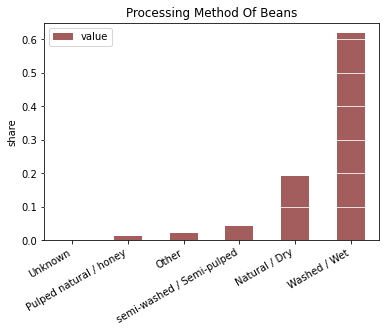

In [ ]:
# # your code
from matplotlib.ticker import FuncFormatter
l = df['Processing.Method']

l= df['Processing.Method'].fillna('Unknown')
l


#######
p1 = df.loc[df["Processing.Method"] == 'Washed / Wet', "Processing.Method"]
p1

p1c = p1.shape
p11 = p1c[0]/1311



p2 = df.loc[df["Processing.Method"] == 'Natural / Dry', "Processing.Method"]
p2c = p2.shape
p22 = p2c[0]/1311


p3 = df.loc[df["Processing.Method"] == 'Semi-washed / Semi-pulped', "Processing.Method"]
p3c = p3.shape
p33 = p3c[0]/1311


p4 = df.loc[df["Processing.Method"] == 'Other', "Processing.Method"]
p4c = p4.shape
p44 = p4c[0]/1311


p5 = df.loc[df["Processing.Method"] == 'Unknown', "Processing.Method"]
p5c = p5.shape
p55 = p5c[0]/1311

p6 = df.loc[df["Processing.Method"] == 'Pulped natural / honey', "Processing.Method"]
p6c = p6.shape

p66 = p6c[0]/1311
data = [['Pulped natural / honey', p66], ['Unknown', p55], ['Other', p44],
       ['semi-washed / Semi-pulped', p33],['Natural / Dry', p22],
        ['Washed / Wet', p11]]
  
dfOfQ4 = pd.DataFrame(data,columns=['method','value'])
dfOfQ4#this dataframe is for the table




######
from scipy import stats
# we use to create each column first using .loc then do the graph
# #then we set up a new column with percentiles with percent signs in them  then get back
# # to drawing ,the drawing should look exactly like the figure
# #also dont forget to make
print(dfOfQ4.columns)
dfOfQ4.sort_values(by=['value'],inplace=True)#to sort dfofq sereis by value column
dfOfQ4

ax = dfOfQ4.plot.bar(color='#A45D5D')

print(l)
ax.set_title('Processing Method Of Beans')

ax.set_ylabel('share');

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


# # manipulate
vals = ax.get_yticks()

ax.set_xticklabels(dfOfQ4.method.values)
ax.set_axisbelow(False)
ax.yaxis.grid(color='white')
print(dfOfQ4)


# Q5: Correlation Plot for Quality Measures

Now that I have cleaned my dataset and prepared it for analysis, I want to investigate the relationship between the different quality measures in my data. To do this, I plan to create a heatmap that displays the correlations between the variables.

First, I will import the necessary Python libraries, including pandas and seaborn. Then, I will load my cleaned dataset into a pandas DataFrame.

Next, I will create a correlation matrix that calculates the correlation coefficients between each pair of variables. This will help me to identify which variables are strongly correlated with each other.

Finally, I will use the seaborn library to create a heatmap that visualizes the correlation matrix. The heatmap will use color coding to represent the strength of the correlation between each pair of variables. This will allow me to quickly identify which variables are positively or negatively correlated with each other, and which ones have no relationship. By examining the heatmap, I will be able to gain insights into the underlying structure of my data and identify any patterns or trends that may be present.






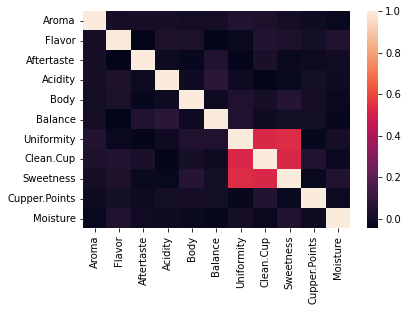

In [ ]:
# your code
from  matplotlib.colors import LinearSegmentedColormap
df['Processing.Method'] = df['Processing.Method'].dropna()
dfq5 = df['Processing.Method']
dfOfQ6 = pd.DataFrame(df,columns=['Aroma','Flavor','Aftertaste','Acidity','Body',
   'Balance' , 'Uniformity',   'Clean.Cup'    ,'Sweetness'   ,'Cupper.Points' ,'Moisture'        ])

corr = dfOfQ6.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



# cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# cmap=LinearSegmentedColormap.from_list('r','r', N=256) 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]





corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': 'pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


plt.show()
